In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Excercise 10
The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
X, y = olivetti.data, olivetti.target

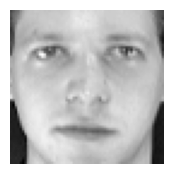

In [ ]:
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(X[0].reshape(64, 64), cmap="gray")

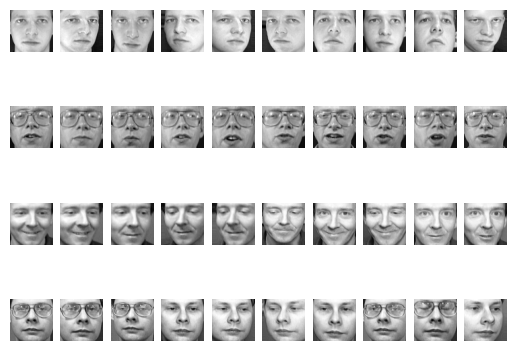

In [ ]:
plt.figure()
for i in range(40):
  plt.subplot(4, 10, i+1, frameon=False)
  plt.imshow(X[i].reshape(64, 64), cmap="gray")
  plt.axis('off')

In [ ]:
from sklearn.model_selection import train_test_split

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, stratify=y_train_valid, test_size=0.2, random_state=42)

In [ ]:
for arr in (y, y_train, y_test):
    print(np.unique(arr, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Seems the sampling is stratified enough.
Now, let's try to cluster the dataset using KMeans. We will pretend we don't know the number of clusters. So, let's try to determine the optimal number of clusters by plotting the inertia vs the number of clusters first.

Also, let's keep track of silhouette scores while we're at it.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = np.arange(5, 100, 5)
inertia_values = []
silhouette_scores = []
for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(X_train)
  inertia_values.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

Text(0, 0.5, 'Inertia')

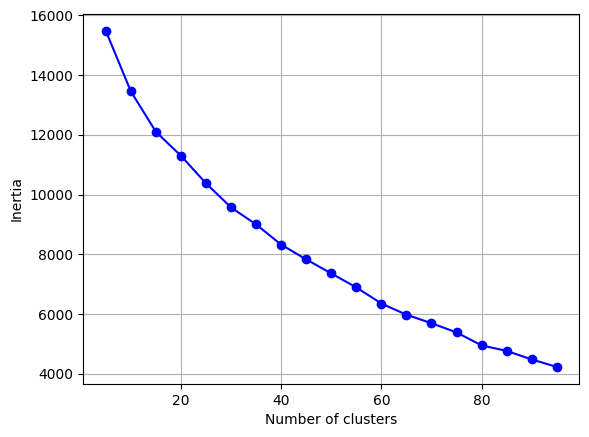

In [ ]:
plt.plot(k_values, inertia_values, 'bo-')
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

I don't see much of an elbow..
What about the silhouette scores?

In [ ]:
k_values[np.argmax(silhouette_scores)]

80

In [ ]:
np.max(silhouette_scores)

0.21113563

Text(0, 0.5, 'Silhouette score')

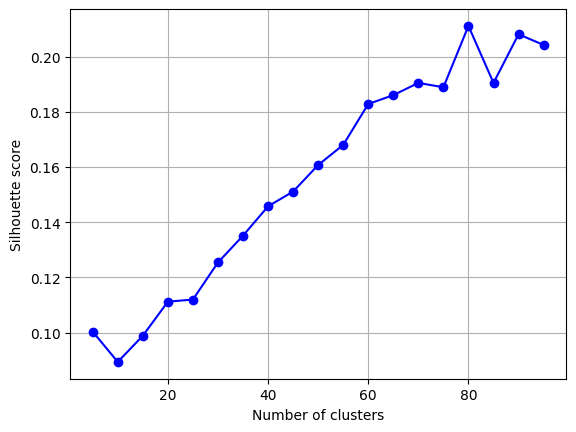

In [ ]:
plt.plot(k_values, silhouette_scores, 'bo-')
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")

Let's go with k=80 for now.

In [ ]:
kmeans = KMeans(n_clusters=80, n_init=10, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=80, n_init=10, random_state=42)

In [ ]:
kmeans.labels_.shape

(288,)

In [ ]:
kmeans.labels_

array([19, 71, 16, 65, 46, 55,  2, 45,  7, 17, 47, 67, 57, 63, 27, 65, 37,
       17, 74, 32, 34, 44, 45, 13, 12, 41, 24, 35, 16, 31, 62, 20, 51,  5,
       55,  9, 18, 62, 61,  8, 38, 69, 23, 67, 12, 10, 32, 28,  2,  8, 43,
        2, 21,  3, 39,  5, 19, 39, 34, 30,  7, 64, 11,  8, 42, 34, 46, 67,
       23,  4,  3, 56, 28, 13, 16, 73, 14, 11, 60, 37, 49,  9,  1, 23, 26,
        5,  4, 53, 32, 56, 37, 41, 40, 14, 61, 68, 77, 15, 28,  9, 57, 16,
       20, 48, 30, 43, 60, 21, 15, 59, 25, 23,  7,  6, 69, 41, 73, 14,  7,
       31,  9, 36, 35, 76, 66, 33, 51,  8, 67, 20, 78, 57,  5, 73, 55, 69,
        6,  6, 70, 62, 62, 76, 51, 73, 62,  3, 24, 17,  0, 15, 32, 13, 35,
       66, 49, 21, 15, 23, 10, 79, 45, 60, 20, 62, 10, 59, 25,  1, 24, 66,
       40, 25, 34,  1, 52, 48, 17, 79, 46, 64,  0, 11, 26, 75, 54, 36, 61,
       35, 15, 12,  1, 20, 35, 47, 40, 42, 29, 20, 59, 24, 43, 55,  9, 13,
       16, 78, 44, 50, 29, 18, 16, 43, 20,  4, 22, 33, 14,  5, 31, 11, 30,
       38,  1, 21, 46,  5

Let's visualize some classes:

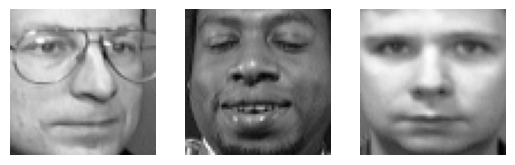

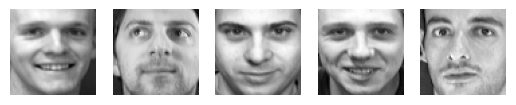

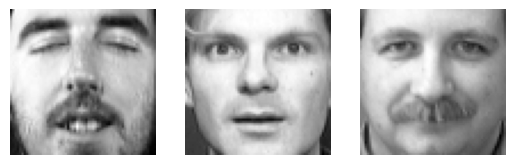

In [ ]:
labels = np.random.randint(low=0, high=79, size=3)
for label in labels:
    indexes, = np.where(kmeans.labels_ == label)    # np.where() returns a tuple
    size = indexes.size
    plt.figure()
    for i in range(size):
      plt.subplot(1, size, i+1)
      plt.imshow(X[indexes[i]].reshape(64, 64), cmap="gray")
      plt.axis('off')

It's not looking very good, but what did we expect with a maximum silhouette score of 0.21? It should ideally be as close to 1 as possible.

Note: The book solution selected k=120 but that solution is not very good either.

### Excercise 11
Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.9583333333333334

Looks pretty good from the get go! Now let's use the KMeans model we built earlier for dimensionality reduction.

In [ ]:
# kmeans.transform() returns the Euclidean distances of every instance to every centroid.
# We are going to use these distances as the new reduced dataset
X_train_reduced = kmeans.transform(X_train).round(2)

In [ ]:
rf_clf_2 = RandomForestClassifier(random_state=42)
rf_clf_2.fit(X_train_reduced, y_train)

X_valid_reduced = kmeans.transform(X_valid).round(2)
y_pred_2 = rf_clf_2.predict(X_valid_reduced)
accuracy_score(y_valid, y_pred_2)

0.8472222222222222

Reducing dimensionality with a kmeans model of 80 clusters worsened the performance of the classifier. Let's use GridSearch

In [ ]:
from sklearn.pipeline import make_pipeline

clf_pipeline = make_pipeline(
    KMeans(n_init=10, random_state=42),
    RandomForestClassifier(random_state=42)
)



In [ ]:
clf_pipeline.named_steps

{'kmeans': KMeans(n_init=10, random_state=42),
 'randomforestclassifier': RandomForestClassifier(random_state=42)}

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    {
        'kmeans__n_clusters': np.arange(5, 100, 5)
    }
]

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5,
                           scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_init=10, random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'kmeans__n_clusters': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             scoring='accuracy')

In [ ]:
print(grid_search.best_score_, grid_search.best_params_)

0.7640653357531761 {'kmeans__n_clusters': 95}


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8611111111111112

We get better accuracy on the validation set than in the cross validation performed by GridSearchCV.. interesting... perhaps because we have few samples when cross-validating?

Let's continue the search with more clusters since the best model was the one with the higher choice given earlier.

In [ ]:
param_grid = [
    {
        'kmeans__n_clusters': np.arange(100, 150, 5)
    }
]

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5,
                           scoring="accuracy")
grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

0.7814882032667876 {'kmeans__n_clusters': 130}


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8194444444444444

Okay, so the best number of clusters we found was 95 which gave us 86% accuracy on the validation set, but this was still worse than the accuracy without the dimensionality reduction step.

Now, let's try to add the extra features (the distances to the centroids) to the original dataset.

I don't know how to do this with GridSearchCV (how to produce the extended feature set?) so I will try to do this manually.

In [ ]:
kmeans = KMeans(n_clusters=80, n_init=10, random_state=42)
new_features = kmeans.fit_transform(X_train)


In [ ]:
X_train_enhanced = np.hstack((X_train, new_features))

In [ ]:
k_values = np.arange(40, 150, 5)
accuracy_scores = []
for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  new_features = kmeans.fit_transform(X_train)
  X_train_enhanced = np.hstack((X_train, new_features))

  rf_clf = RandomForestClassifier(random_state=42)
  rf_clf.fit(X_train_enhanced, y_train)

  X_valid_enhanced = np.hstack((X_valid, kmeans.transform(X_valid)))
  accuracy_scores.append(accuracy_score(y_valid, rf_clf.predict(X_valid_enhanced)))


In [ ]:
accuracy_scores

[0.9861111111111112,
 0.9444444444444444,
 0.9861111111111112,
 0.9722222222222222,
 0.9722222222222222,
 1.0,
 0.9722222222222222,
 0.9722222222222222,
 0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112,
 0.9444444444444444,
 0.9722222222222222,
 0.9722222222222222,
 0.9861111111111112,
 0.9722222222222222,
 0.9722222222222222,
 0.9861111111111112,
 0.9722222222222222,
 1.0,
 0.9722222222222222,
 0.9861111111111112]

What the hell! 100% accuracy? For which k?

In [ ]:
k_values[np.argmax(accuracy_scores)]

65

### Excercise 12
Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.fit_transform(X_valid)
X_test_pca = pca.fit_transform(X_train)

In [ ]:
# Let's try the BayesianGaussianMixture class to automatically determine
# the right number of clusters

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=120, n_init=10, random_state=42)
bgm.fit(X_train_pca)

BayesianGaussianMixture(n_components=120, n_init=10, random_state=42)

In [ ]:
bgm.converged_

True

In [ ]:
bgm.weights_.round(2)

array([0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.03, 0.02, 0.02, 0.01,
       0.02, 0.01, 0.03, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01,
       0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.  ,
       0.01, 0.01, 0.  , 0.  , 0.01, 0.01, 0.  , 0.01, 0.  , 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.count_nonzero(bgm.weights_.round(2))

81

In [ ]:
X_new_pca, labels = bgm.sample(n_samples=10)

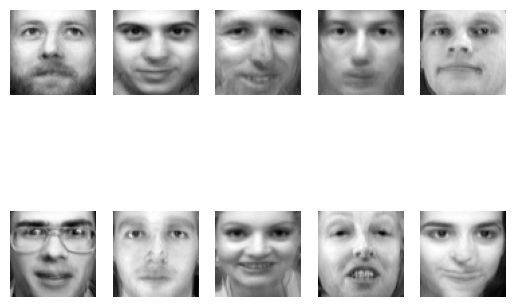

In [ ]:
size = X_new_pca.shape[0]  # 10
for i in range(size):
      plt.subplot(2, size // 2, i+1)
      plt.imshow(pca.inverse_transform(X_new_pca[i]).reshape(64, 64), cmap="gray")
      plt.axis('off')

Haha, they look almost believable!

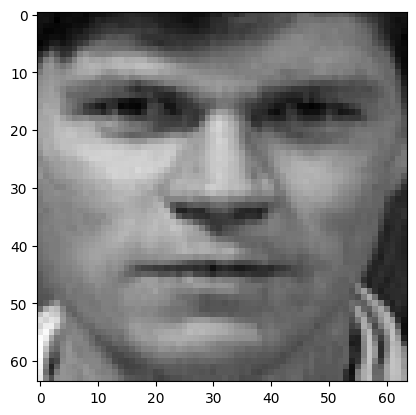

In [ ]:
img_pca = X_train_pca[0]
plt.imshow(pca.inverse_transform(img_pca).reshape(64, 64), cmap="gray")

In [ ]:
modifications = [np.flipud, np.fliplr, np.rot90]
modified_images = []
for i in range(10):
  selected_modification = np.random.choice(modifications)
  modified_images.append(selected_modification(X_train[i].reshape(64, 64)))



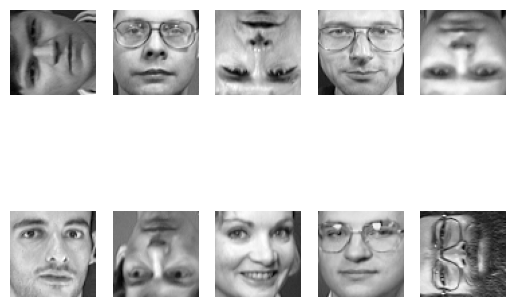

In [ ]:
for i, image in enumerate(modified_images):
      plt.subplot(2, size // 2, i+1)
      plt.imshow(image, cmap="gray")
      plt.axis('off')

In [ ]:
modified_images_arr = np.array(modified_images).reshape(10, -1)

In [ ]:
modified_images_pca = pca.transform(modified_images_arr)

In [ ]:
scores_normal = bgm.score_samples(X_train_pca[:10])
scores_normal


array([394.30097196, 393.58664891, 394.0404471 , 391.04200191,
       392.3933663 , 392.89211296, 393.42298085, 393.4609385 ,
       393.23552786, 393.47628212])

In [ ]:
scores_modified = bgm.score_samples(modified_images_pca)
scores_modified

array([-39969.73525038, -13959.82306914, -56859.56245258, -18387.98611995,
       -45280.14888988, -10416.54602199, -35061.95332453, -18275.90654619,
       -10286.90400982, -41209.45082214])

Indeed, the modified images are considered highly unlikely by the Gaussian Mixture model!

### Excercise 13
Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [ ]:
from sklearn.metrics import mean_squared_error

X_train_reconstructed = pca.inverse_transform(X_train_pca)
mean_squared_error(X_train, X_train_reconstructed)

0.00019190561

In [ ]:
modified_reconstructed = pca.inverse_transform(modified_images_pca)
mean_squared_error(modified_images_arr, modified_reconstructed)

0.005042569

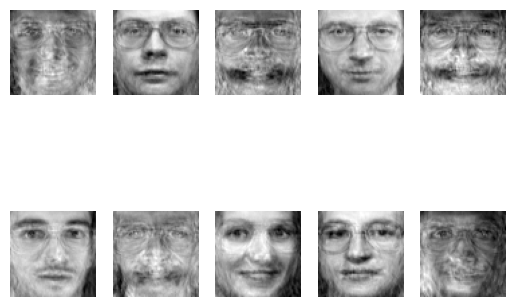

In [ ]:
for i, image in enumerate(modified_reconstructed):
      plt.subplot(2, size // 2, i+1)
      plt.imshow(image.reshape(64, 64), cmap="gray")
      plt.axis('off')